In [19]:
import wandb
import torch
from torch.nn import MSELoss
from traj_dataset import TrajDataset
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader
import PIL
from model import SimpleViT
from old_model import SimpleViT
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


Using device: cuda:0


In [20]:
api = wandb.Api()
# get run
run_id = "9qxy7phl"
run = api.run("/depren/thesis_official_runs/runs/" + run_id)

# load model
conf = run.config

model = SimpleViT(dim=conf['model_dimension'],
                  device=device,
                  mlp_dim=conf['mlp_dimension'],
                  image_size=(conf['image_size'], conf['image_size']),
                  image_patch_size=(conf['patch_size'], conf['patch_size']),
                  frame_patch_size=conf['patch_depth'],
                  frames=conf['n_prev'],
                  depth=conf['model_depth'],
                  heads=conf['heads'],
                  )
print(model.device)
model.load_state_dict(torch.load(conf['save_name'],map_location=device))
print(model.device)




cuda:0
cuda:0


In [92]:
#folders = [f"bookstore/video{k}/" for k in range(1)]
#folders += [f"coupa/video{k}/" for k in range(1)]
folders = [f"deathCircle/video{k}/" for k in range(1)]
#folders += [f"gates/video{k}/" for k in range(1)]
#folders += [f"hyang/video{k}/" for k in range(1)]
#folders += [f"little/video{k}/" for k in range(1)]
#folders += [f"nexus/video{k}/" for k in [k for k in range(1)]]
#folders += [f"quad/video{k}/" for k in range(1)]

#folders = ["deathCircle/video0/","deathCircle/video2/","deathCircle/video4/"]
#folders = ["deathCircle/video1/","deathCircle/video3/","nexus/video1/"]
#folders = ["bookstore/video0/"]
#folders = ["deathCircle/video3/"]
#folders = ["nexus/video1/"]


In [94]:

data_config = run.config['dataset']
#folders = TrajDataset.conf_to_folders(data_config)
size = f"{conf['image_size']}_{conf['image_size']}_{conf['block_size']}"
data_folders = ["/waldo/walban/student_datasets/arfranck/SDD/scenes/" + folder + size for folder in folders]


props = [conf['train_prop'], conf['val_prop'], conf['test_prop']]
n_prev = conf['n_prev']
n_next = conf['n_next']
img_step = conf['img_step']
train_data = TrajDataset(data_folders, n_prev=n_prev, n_next=n_next, img_step=img_step, prop=props, part=0,path=True)
val_data = TrajDataset(data_folders, n_prev=n_prev, n_next=n_next, img_step=img_step, prop=props, part=1,path=True)
test_data = TrajDataset(data_folders, n_prev=n_prev, n_next=n_next, img_step=img_step, prop=props, part=2,path=True)

704
opening track 383 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 509 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 243 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 185 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 649 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 347 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 335 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 623 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 455 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 63 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/vi

opening track 676 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 353 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 460 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 678 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 427 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 132 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 491 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 449 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 266 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 118 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video

opening track 628 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 362 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 563 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 140 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 191 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 77 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 339 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 286 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 657 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 262 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0

opening track 221 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 458 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 526 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 392 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 484 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 168 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 673 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 627 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 116 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 555 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video

opening track 283 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 354 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 658 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 313 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 154 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 278 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 591 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 580 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 145 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 189 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video

opening track 661 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 338 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 636 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 422 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 374 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 356 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 457 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 602 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 232 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 423 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video

opening track 478 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 646 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 610 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 659 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 109 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 248 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 342 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 600 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 121 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 263 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video

opening track 390 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 394 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 65 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 671 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 672 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 156 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 112 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 48 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 93 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 505 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/6

opening track 389 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 94 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 696 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 344 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 220 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
64
64
704
opening track 159 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 674 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 348 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 691 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCircle/video0/64_64_4
opening track 163 from /waldo/walban/student_datasets/arfranck/SDD/scenes/deathCir

In [98]:

batch_size=conf['batch_size']
batch_size = 128

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
counter = 0

4
Test Batch 0
0.009582149796187878
8


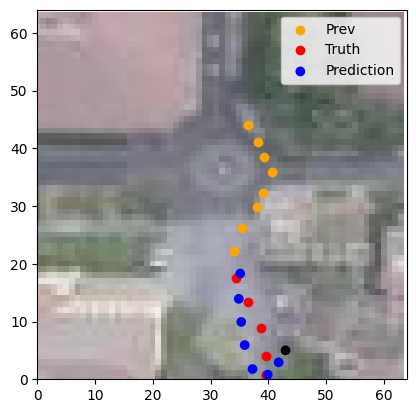

Test Batch 1
0.008793443441390991
8


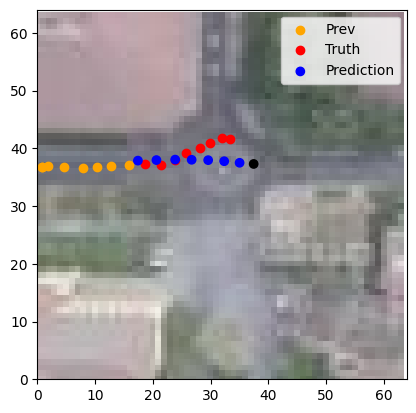

Test Batch 2
0.007891304790973663
8


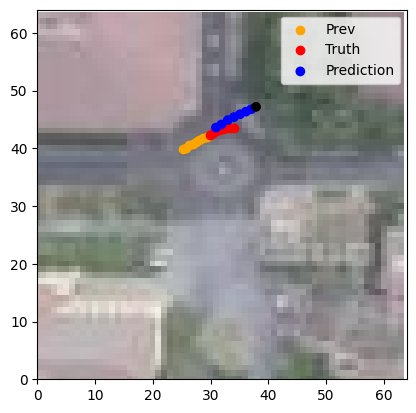

Test Batch 3
0.007951131090521812
8


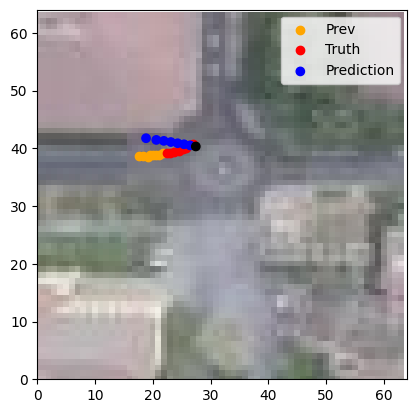

Test Batch 0
0.009954899549484253
8


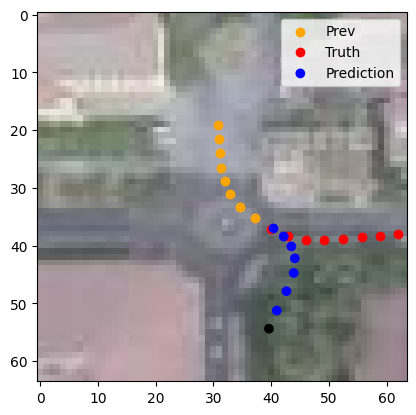

Test Batch 1
0.024744153022766113
8


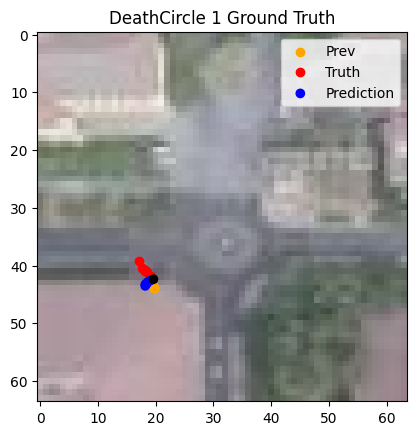

Test Batch 2
0.018830029293894768
8


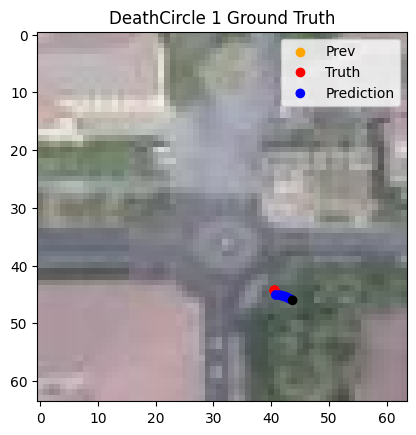

Test Batch 3
0.02187626250088215
8


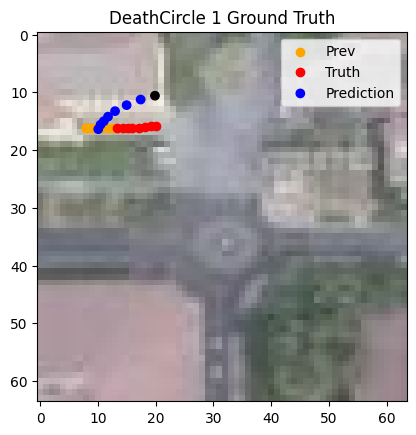

Test Batch 4
0.010349072515964508
8


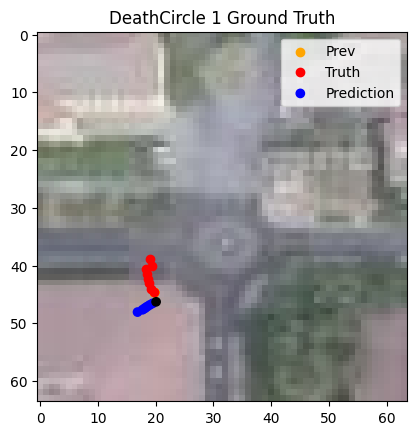

Test Batch 5
0.016950955614447594
8


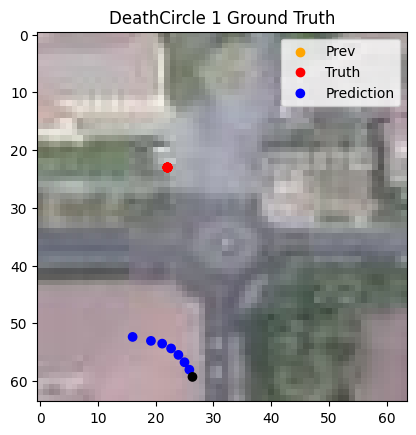

Test Batch 6
0.01024277601391077
8


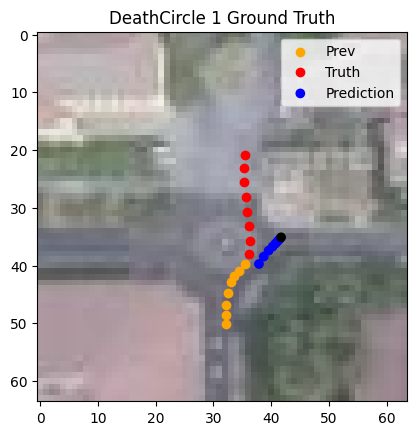

Test Batch 7
0.014936545863747597
8


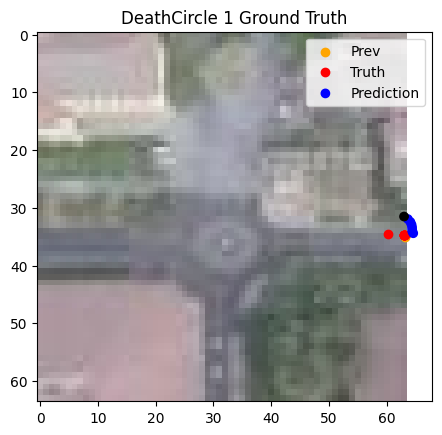

Test Batch 8
0.01889265701174736
8


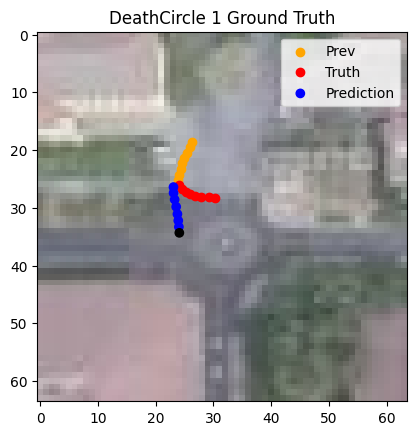

Test Batch 9
0.01206357590854168
8


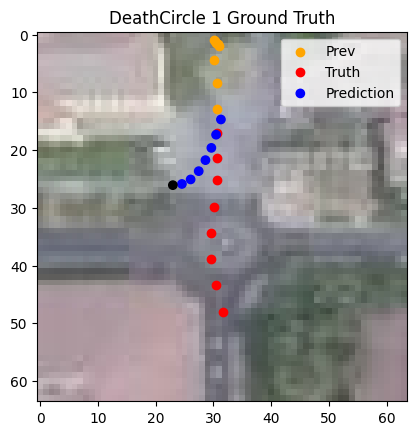

Test Batch 10
0.010581335052847862
8


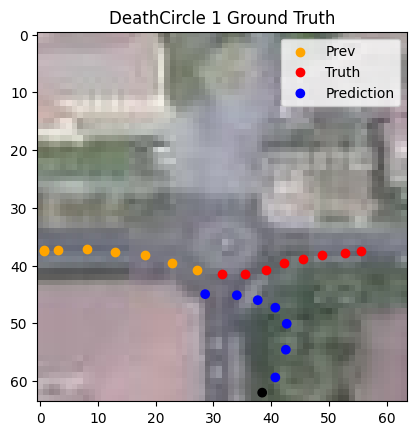

Test Batch 11
0.012363657355308533
8


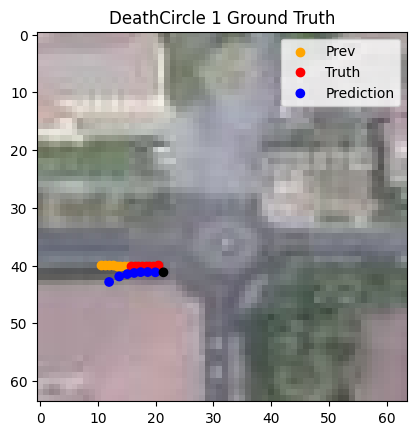

Test Batch 12
0.01220930740237236
8


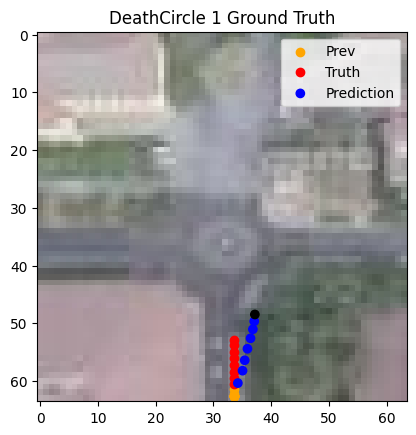

Test Batch 13
0.014301178976893425
8


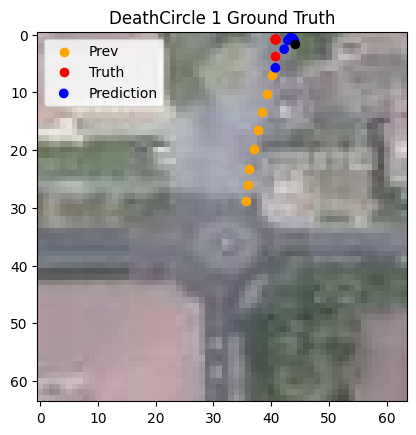

Test Batch 14
0.012800555676221848
8


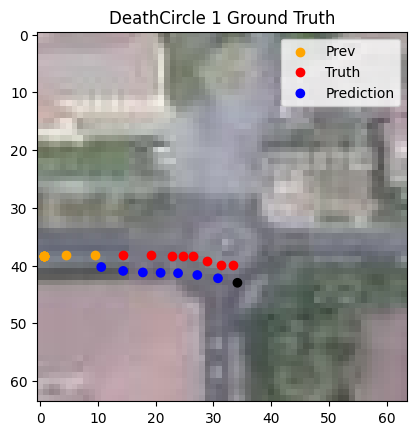

Test Batch 15
0.017304349690675735
8


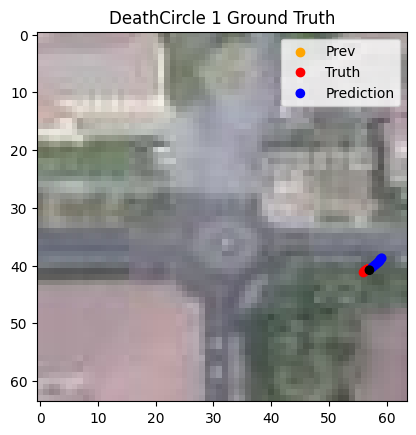

Test Batch 16
0.015823952853679657
8


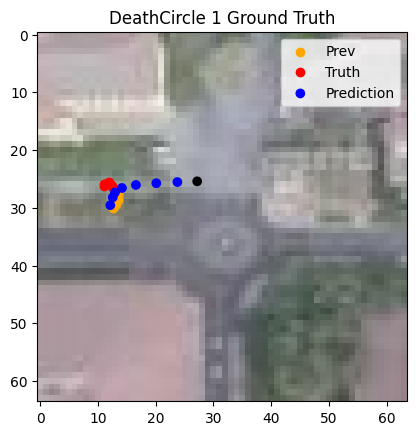

Test Batch 17
0.014949694275856018
8


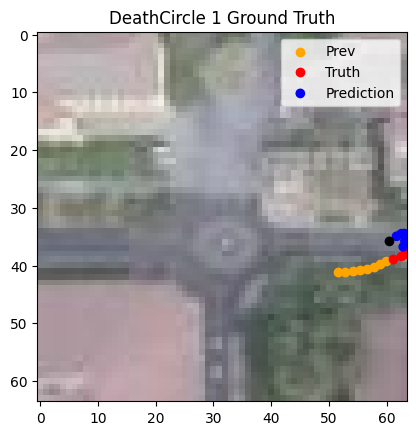

Test Batch 18
0.02080356888473034
8


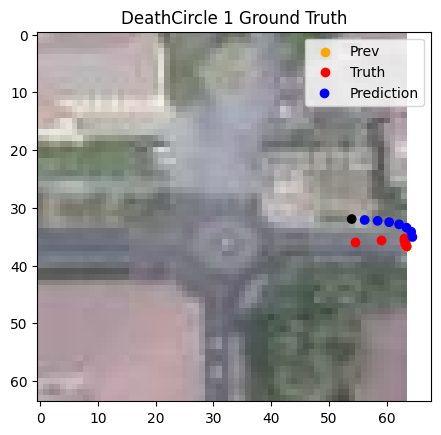

Test Batch 19
0.00985097698867321
8


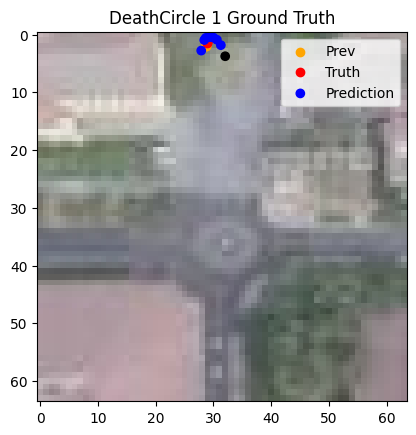

Test Batch 20
0.0164189375936985
8


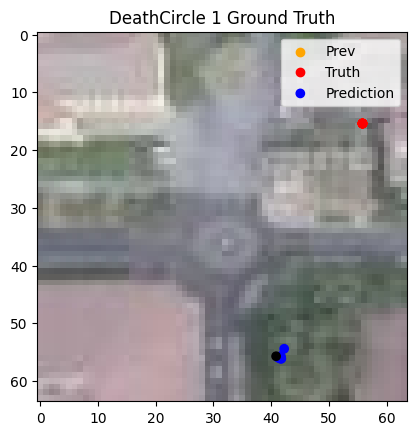

Test Batch 21
0.014743143692612648
8


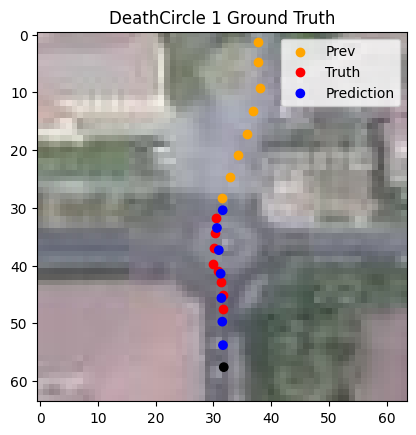

Test Batch 22
0.020444463938474655
8


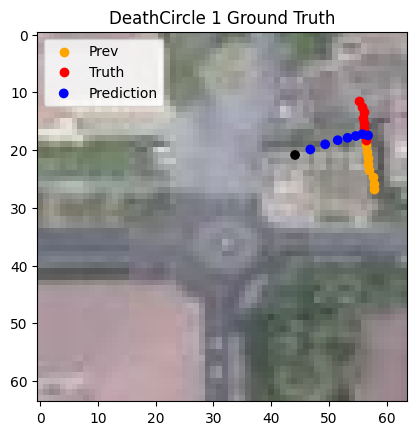

Test Batch 23
0.014230746775865555
8


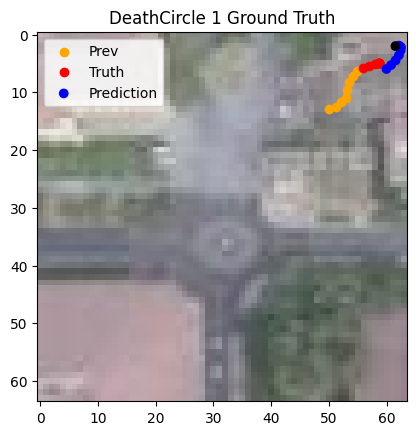

Test Batch 24
0.012078419327735901
8


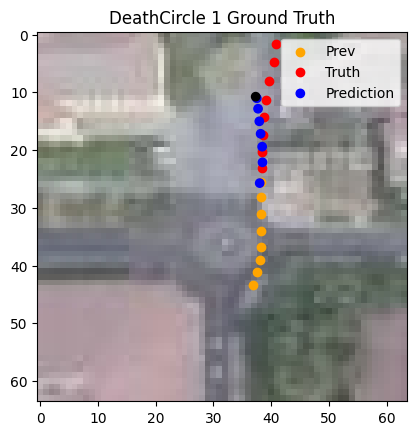

Test Batch 25
0.017255421727895737
8


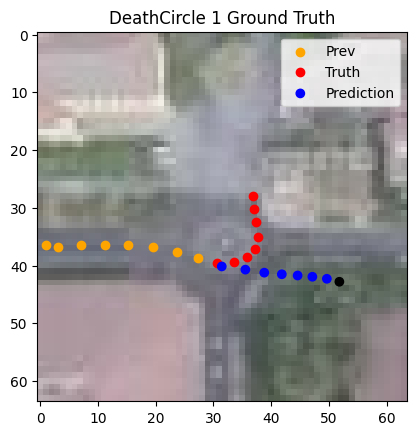

Test Batch 26
0.01364140398800373
8


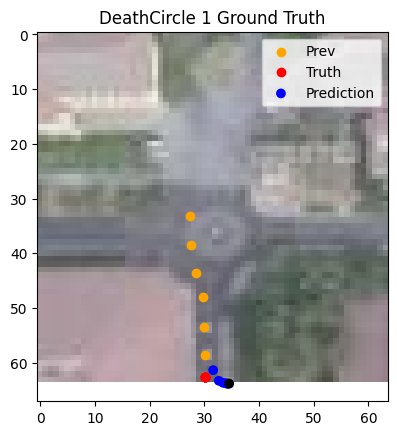

Test Batch 27
0.014695475809276104
8


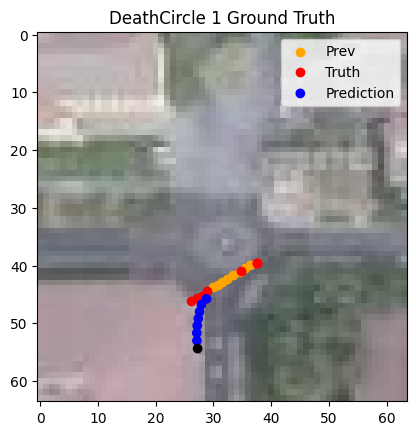

Test Batch 28
0.016647379845380783
8


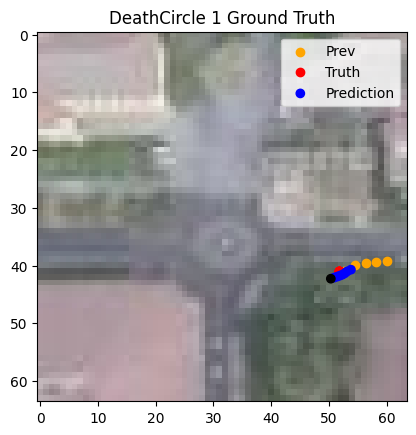

Test Batch 29
0.016735099256038666
8


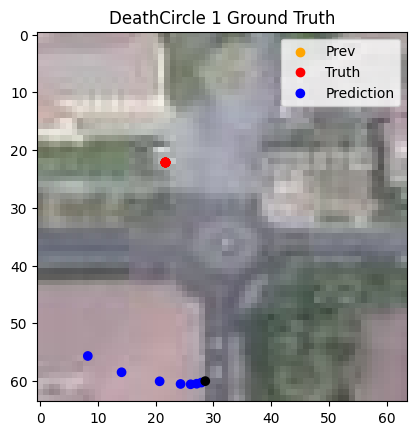

Test Batch 30
0.014817179180681705
8


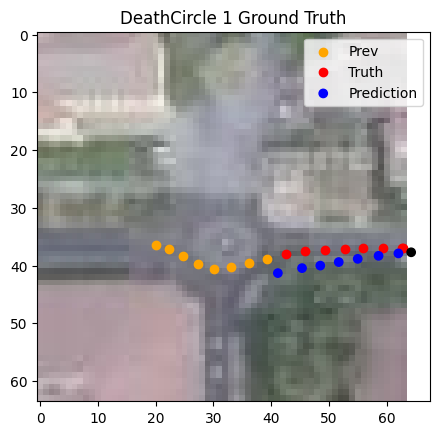

Test Batch 31
0.012093670666217804
8


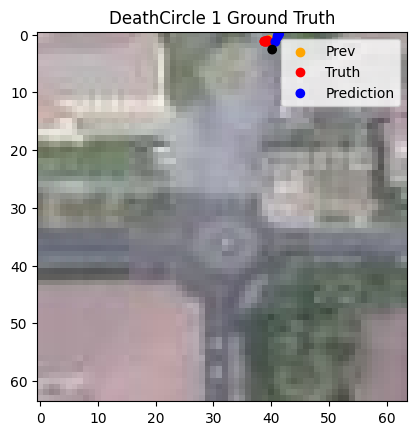

Test Batch 32
0.015239076688885689
8


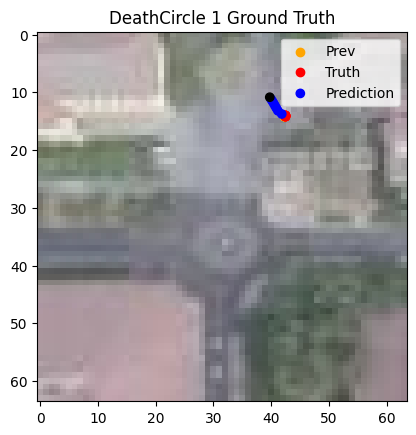

Test Batch 33
0.010278381407260895
8


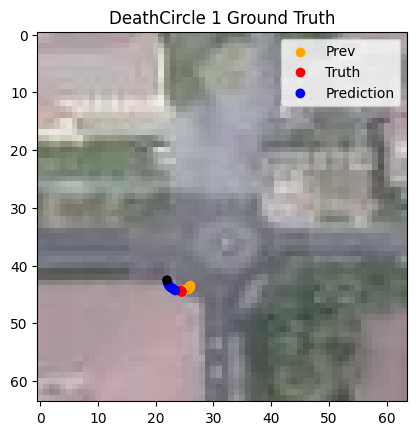

Test Batch 34
0.011942706070840359
8


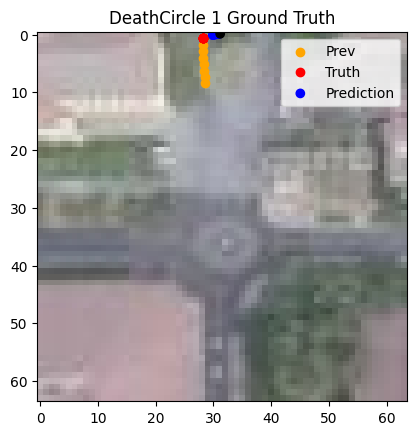

Test Batch 35
0.0162657443434
8


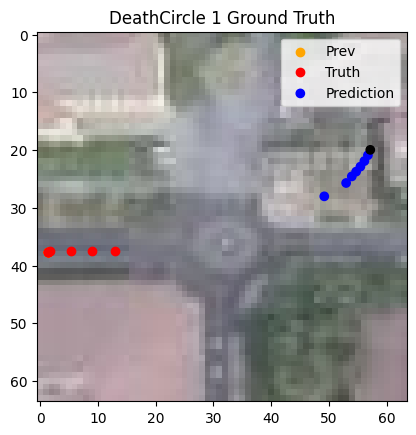

Test Batch 36
0.014865893870592117
8


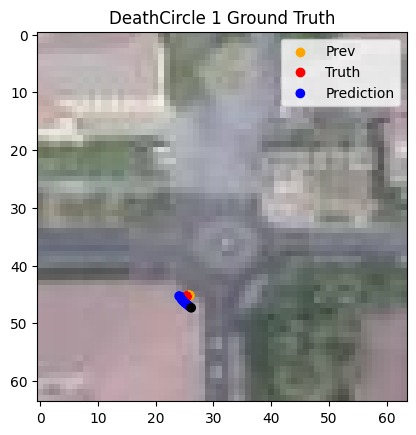

Test Batch 37
0.010925383307039738
8


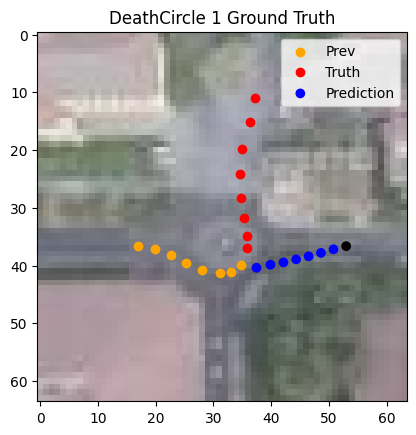

Test Batch 38
0.012129579670727253
8


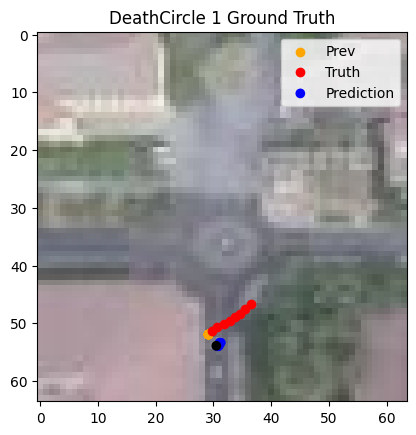

Test Batch 39
0.02223634161055088
8


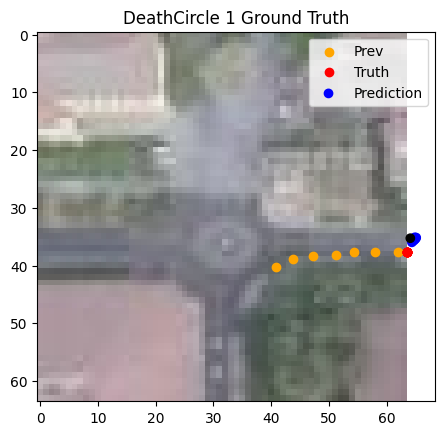

Test Batch 40
0.022246159613132477
8


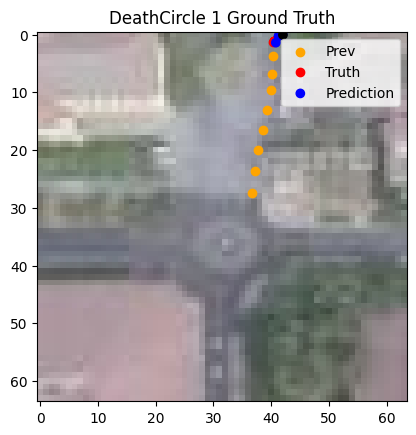

Test Batch 41
0.009373226203024387
8


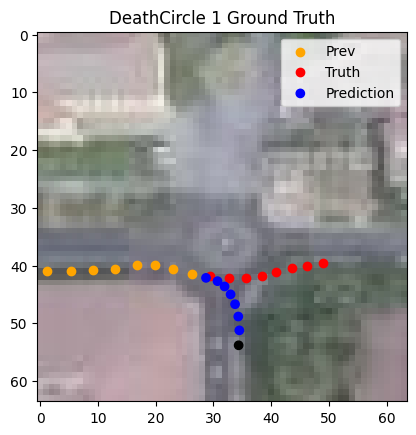

Test Batch 42
0.013136422261595726
8


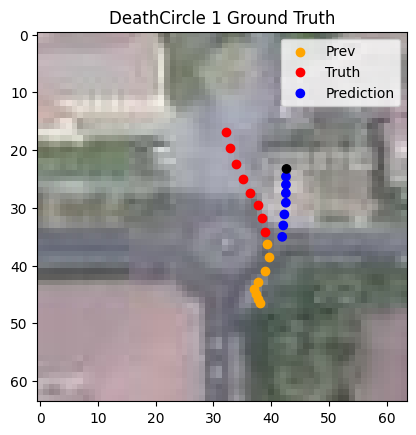

Test Batch 43
0.017077265307307243
8


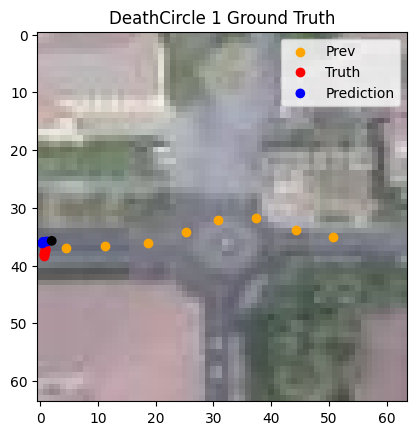

Test Batch 44
0.018481295555830002
8


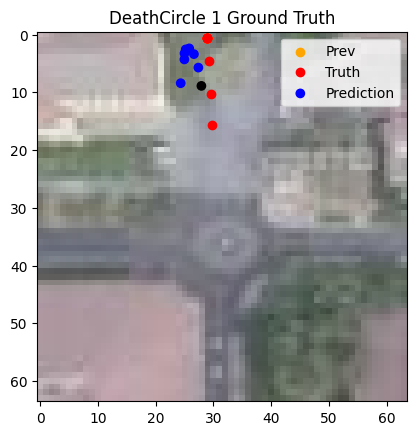

Test Batch 45
0.01345323957502842
8


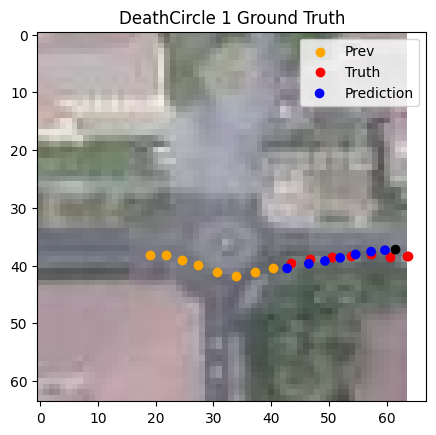

Test Batch 46
0.012222805991768837
8


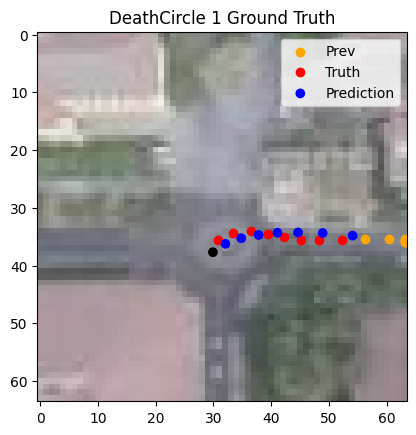

Test Batch 47
0.015124853700399399
8


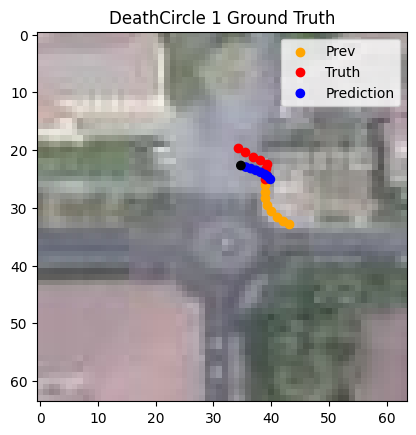

Test Batch 48
0.01263824850320816
8


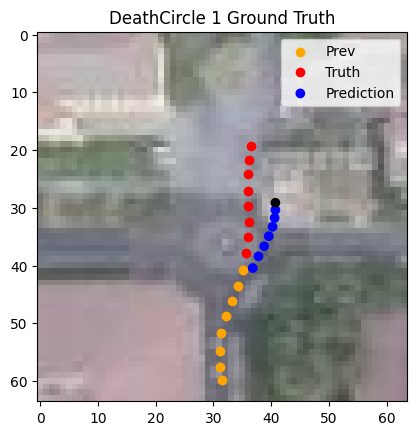

Test Batch 49
0.010668031871318817
8


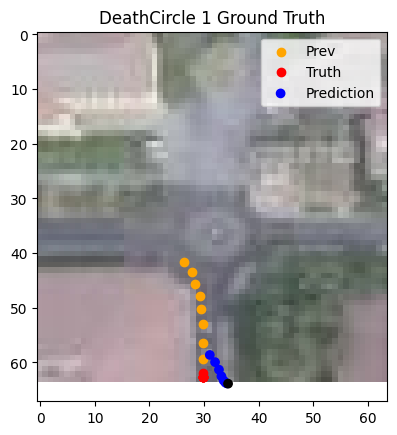

Test Batch 50
0.01917920634150505
8


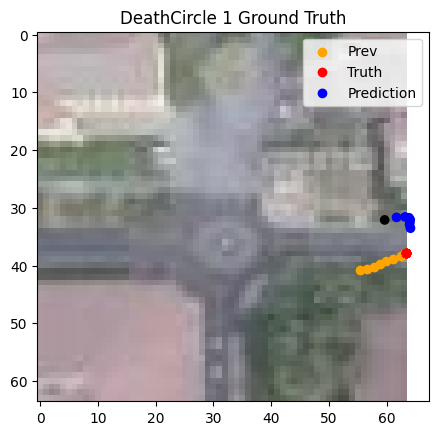

Test Batch 51
0.016092341393232346
8


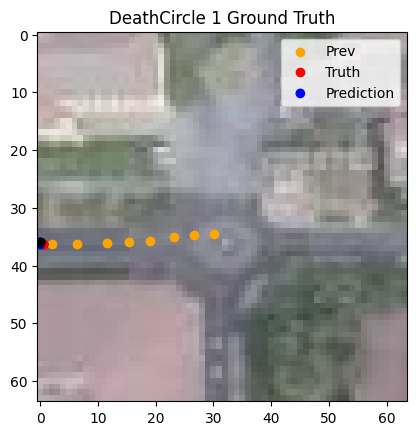

Test Batch 52
0.015368627384305
8


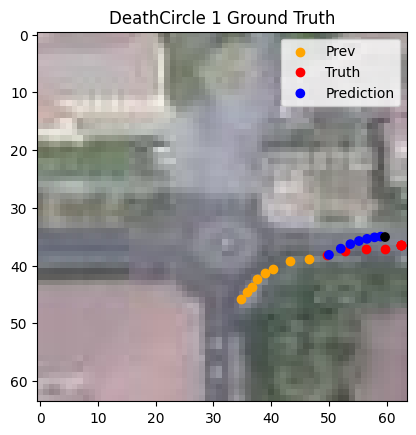

Test Batch 53
0.013774446211755276
8


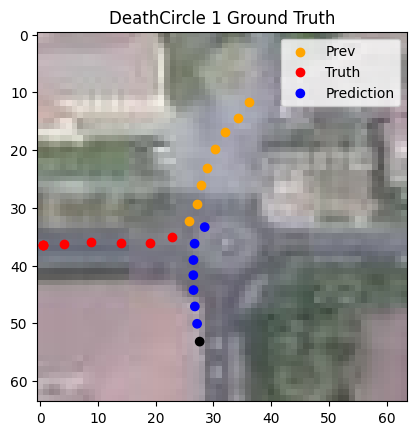

Test Batch 54
0.015146919526159763
8


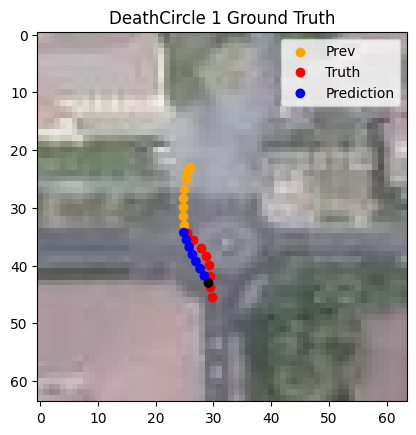

Test Batch 55
0.014306649565696716
8


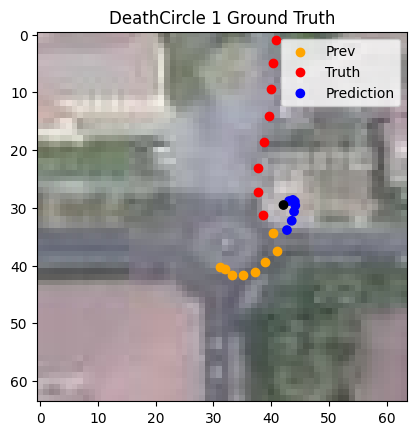

Test Batch 56
0.015567968599498272
8


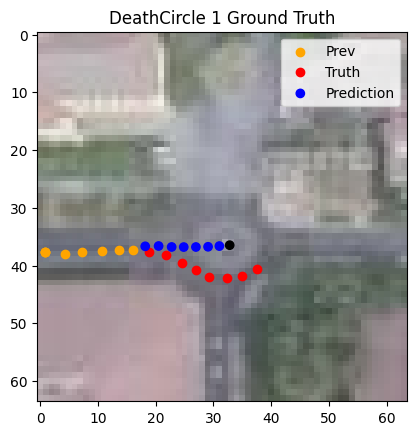

Test Batch 57
0.02311178296804428
8


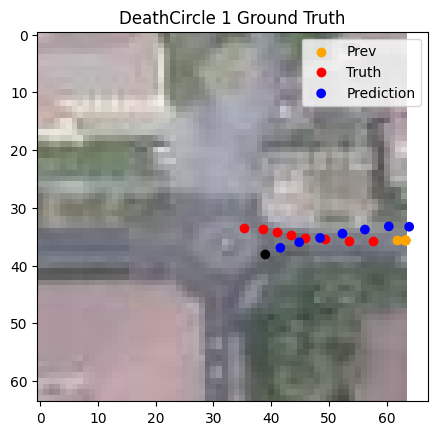

Test Batch 58
0.01194659061729908
8


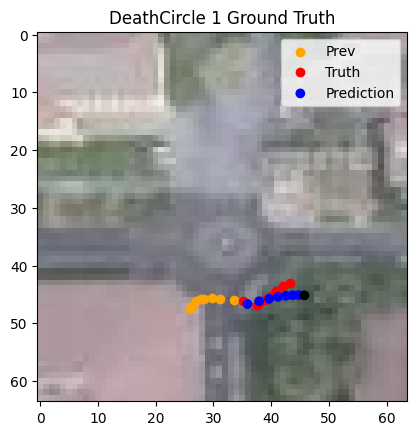

Test Batch 59
0.017619648948311806
8


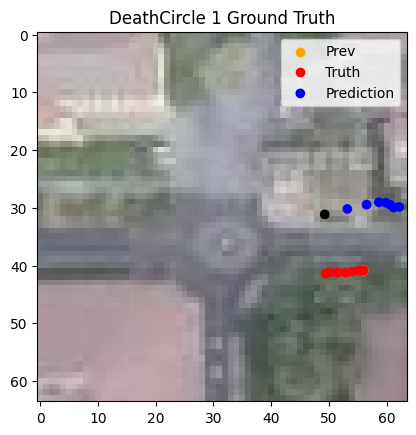

Test Batch 60
0.0163897518068552
8


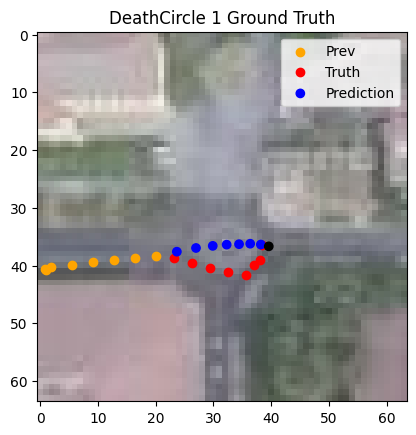

Test Batch 61
0.013455438427627087
8


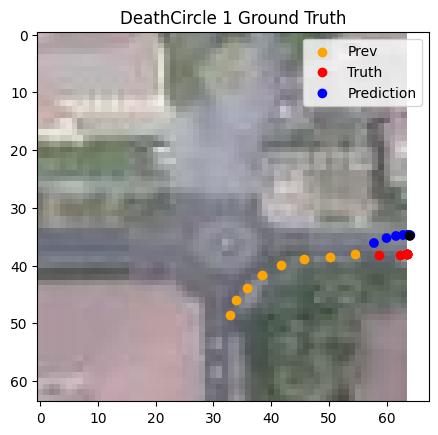

Test Batch 62
0.012303498573601246
8


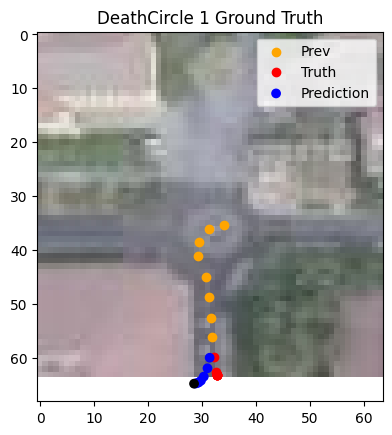

Test Batch 63
0.013759903609752655
8


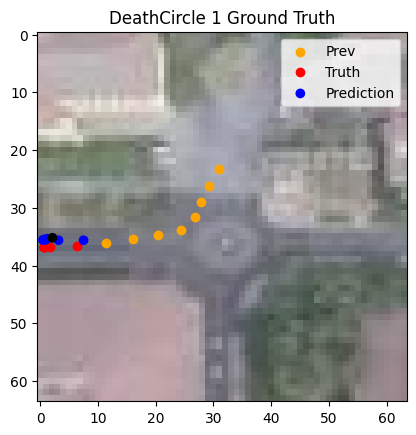

Test Batch 64
0.015883825719356537
8


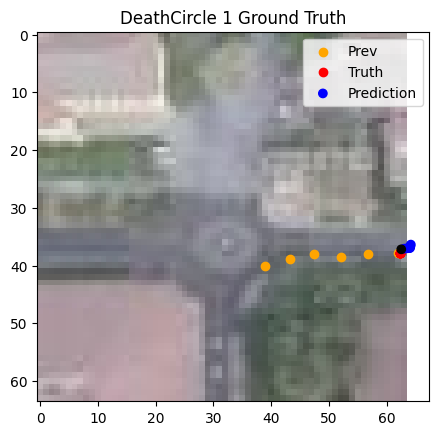

Test Batch 65
0.012207156047224998
8


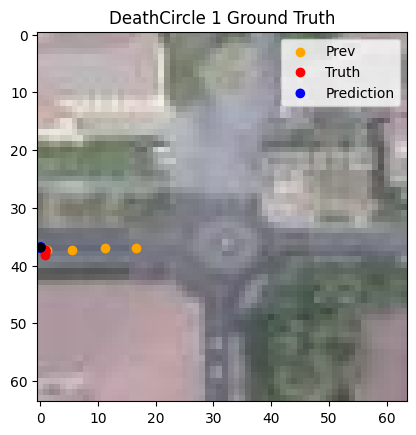

Test Batch 66
0.0131690613925457
8


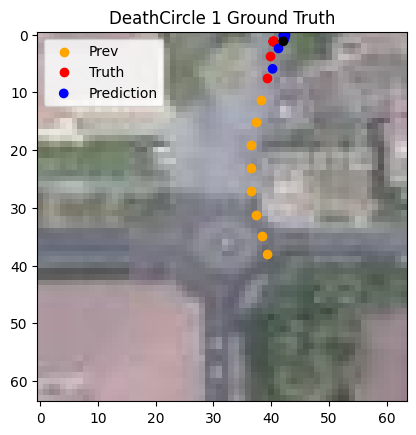

Test Batch 67
0.01695854403078556
8


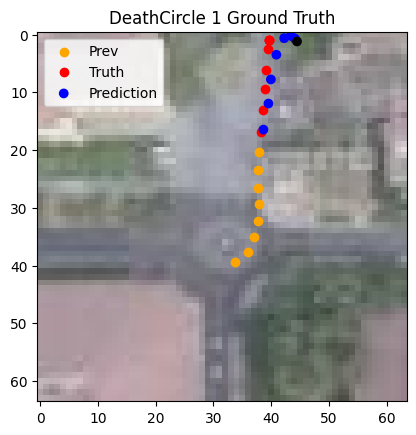

Test Batch 68
0.009572835639119148
8


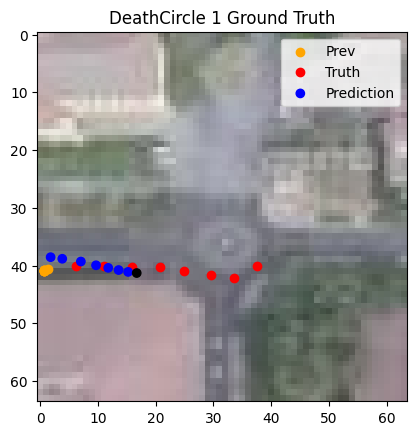

Test Batch 69
0.008722994476556778
8


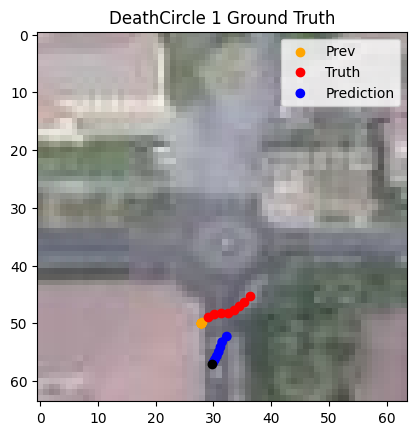

Test Batch 70
0.01913481205701828
8


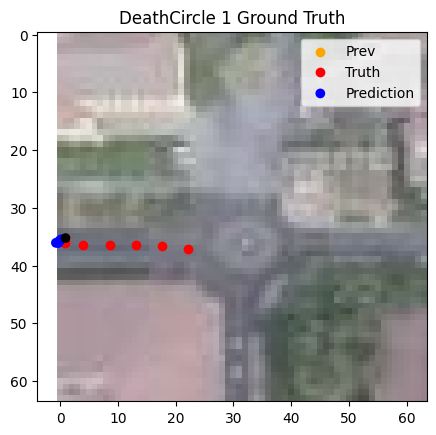

Test Batch 71
0.01984034664928913
8


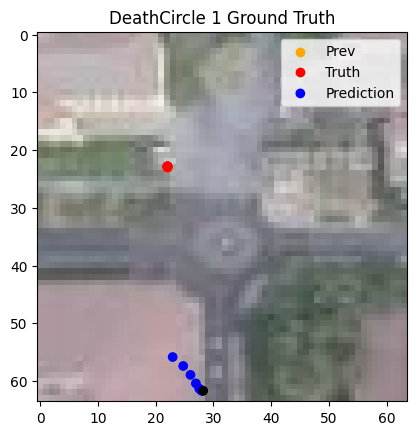

Test Batch 72
0.011109048500657082
8


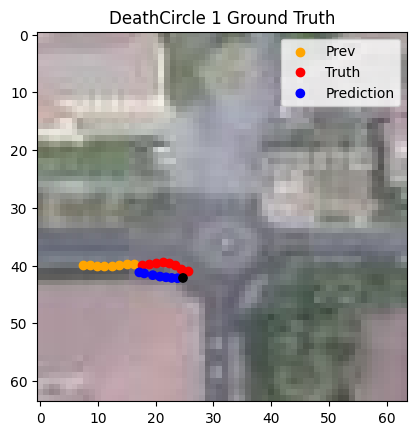

Test Batch 73
0.01097818836569786
8


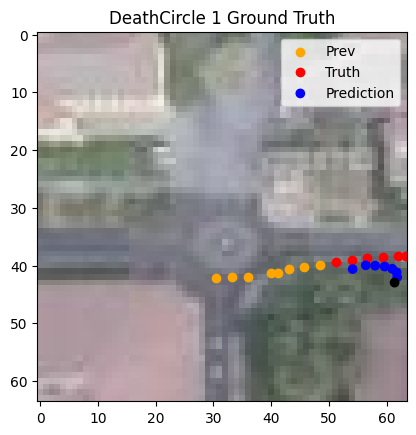

Test Batch 74
0.01787695102393627
8


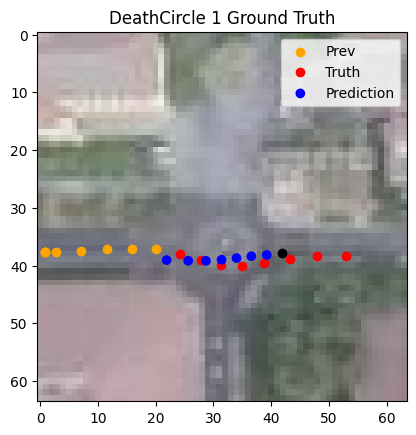

Test Batch 75
0.013964270241558552
8


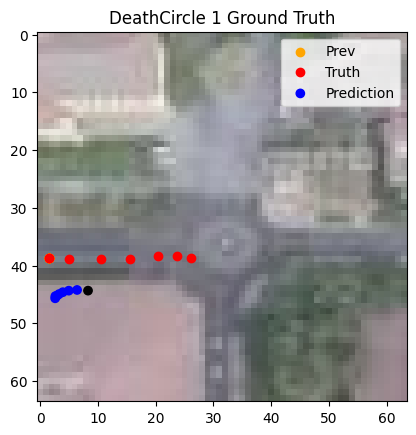

Test Batch 76
0.013497935608029366
8


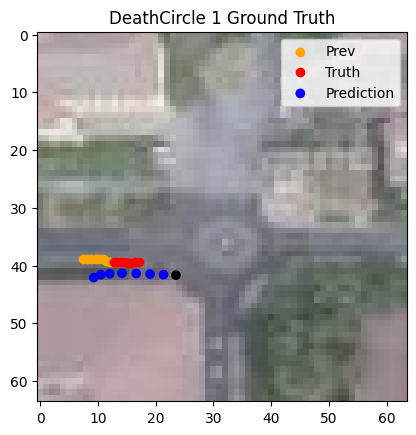

Test Batch 77
0.014006039127707481
8


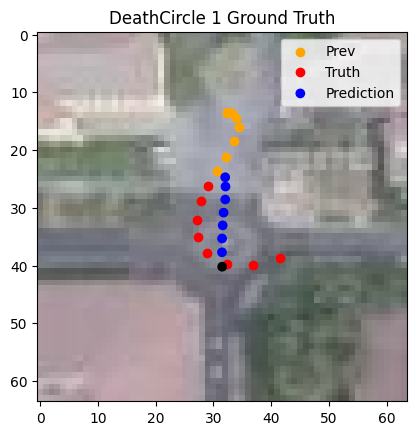

Test Batch 78
0.017127390950918198
8


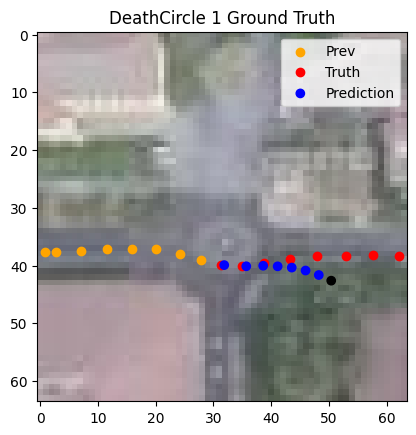

Test Batch 79
0.012129882350564003
8


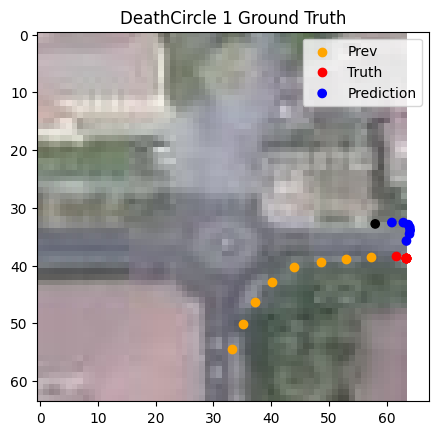

Test Batch 80
0.014908445067703724
8


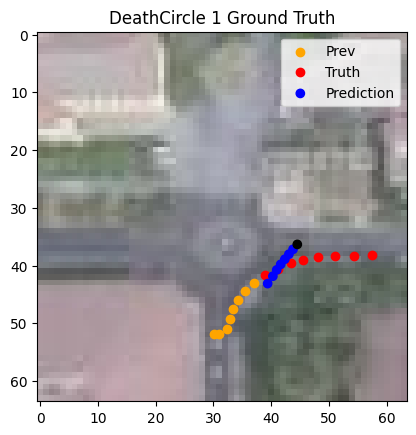

Test Batch 81
0.012026548385620117
8


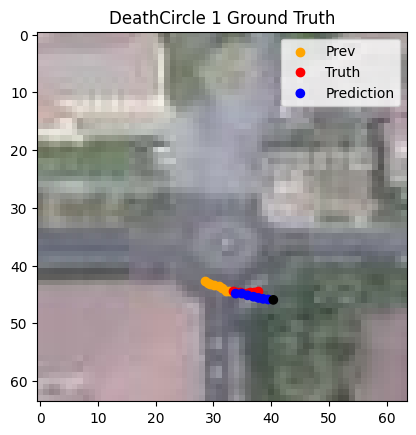

Test Batch 82
0.013268904760479927
8


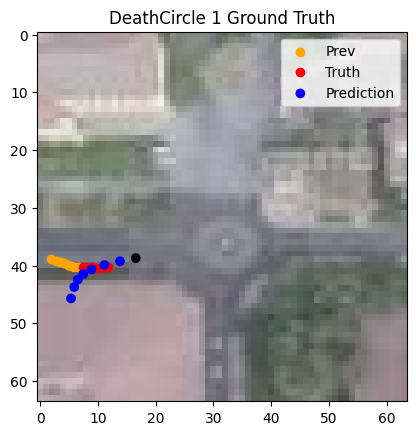

Test Batch 83
0.013048195280134678
8


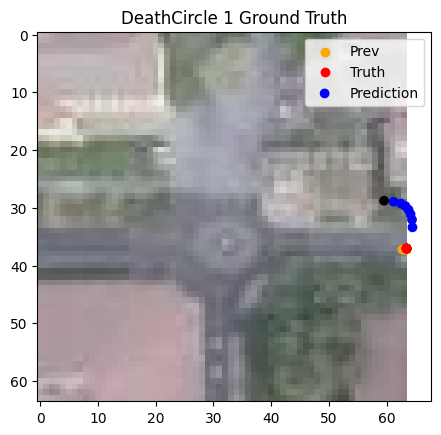

Test Batch 84
0.020813511684536934
8


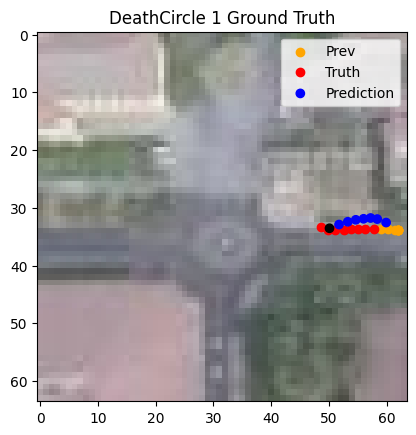

Test Batch 85
0.010215087793767452
8


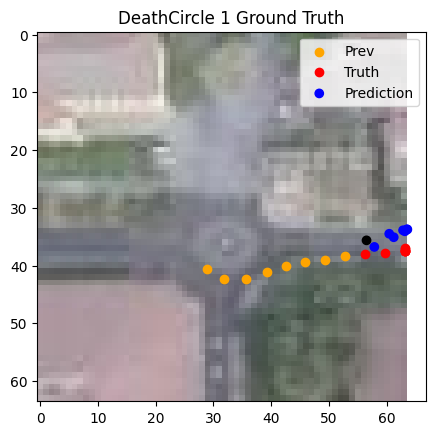

Test Batch 86
0.012727181427180767
8


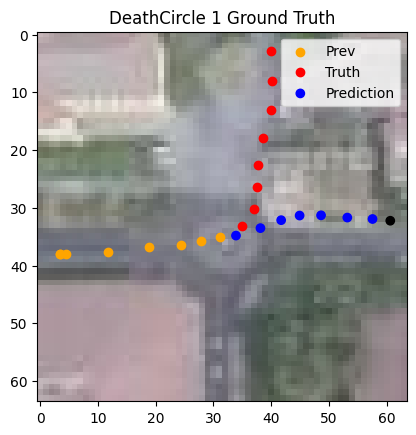

Test Batch 87
0.015094209462404251
8


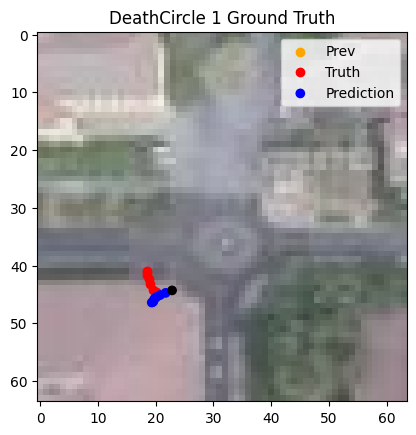

Test Batch 88
0.017534103244543076
8


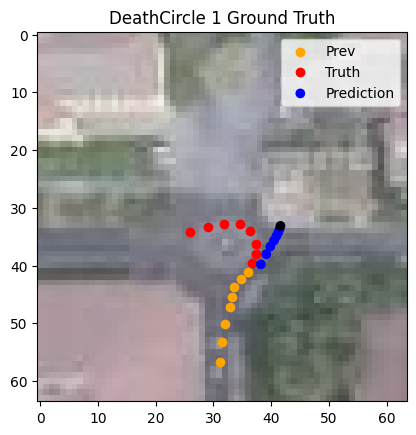

Test Batch 89
0.0137131093069911
8


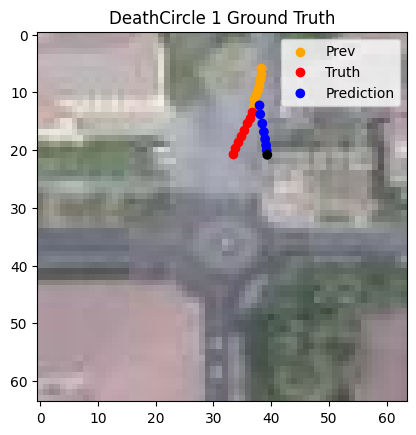

[0.009582149796187878, 0.008793443441390991, 0.007891304790973663, 0.007951131090521812, 0.009954899549484253, 0.024744153022766113, 0.018830029293894768, 0.02187626250088215, 0.010349072515964508, 0.016950955614447594, 0.01024277601391077, 0.014936545863747597, 0.01889265701174736, 0.01206357590854168, 0.010581335052847862, 0.012363657355308533, 0.01220930740237236, 0.014301178976893425, 0.012800555676221848, 0.017304349690675735, 0.015823952853679657, 0.014949694275856018, 0.02080356888473034, 0.00985097698867321, 0.0164189375936985, 0.014743143692612648, 0.020444463938474655, 0.014230746775865555, 0.012078419327735901, 0.017255421727895737, 0.01364140398800373, 0.014695475809276104, 0.016647379845380783, 0.016735099256038666, 0.014817179180681705, 0.012093670666217804, 0.015239076688885689, 0.010278381407260895, 0.011942706070840359, 0.0162657443434, 0.014865893870592117, 0.010925383307039738, 0.012129579670727253, 0.02223634161055088, 0.022246159613132477, 0.009373226203024387, 0.0

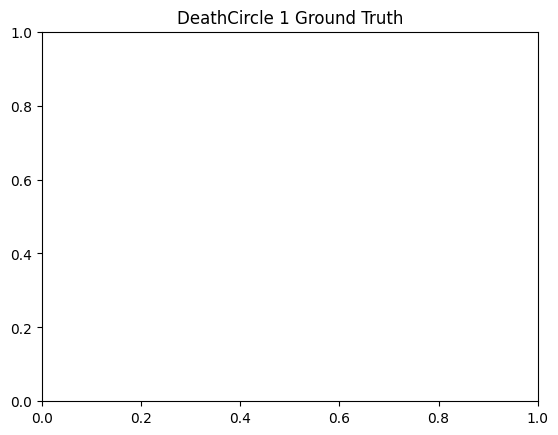

In [100]:
criterion = torch.nn.MSELoss()
k = 0
losses = []
counter += 1
print(counter)
N_PRED = 8

for id_b2, batch_test in enumerate(val_loader):
    
    counter += 1
    with torch.no_grad():
        print(f"Test Batch {id_b2}")
        model.eval()

        X_test = batch_test["src"]
        Y_test = batch_test["tgt"]


        X_coords = batch_test["coords"]
        
        path = batch_test["path"]

        future = None

        for k in range(N_PRED):
            pred,output = model(X_test.to(device),future,train=False)
            future = output

        #print(criterion(pred,Y_test.to(device)).item())
        losses.append(criterion(pred,Y_test.to(device)).item())
        print(criterion(pred,Y_test.to(device)).item())
        prev = [(k[0]*64,k[1]*64) for k in X_coords[0]]
        points = [(k[0]*64,k[1]*64) for k in Y_test[0]]
        points2 = [(k[0]*64,k[1]*64) for k in pred[0].cpu().detach().numpy()]

        prev_x,prev_y = zip(*prev)
        x,y = zip(*points)
        x2,y2 = zip(*points2)
        print(len(points))
        img = PIL.Image.open(path[0]+"/reference.jpg")
        plt.imshow(img)
        plt.scatter([k for k in prev_x],[k for k in prev_y], label="Prev",color="orange")
        plt.scatter([k for k in x],[k for k in y], label="Truth",color="red")
        plt.scatter([k for k in x2],[k for k in y2],label="Prediction",color=(["blue" for k in range(N_PRED-1)] + ["black"]))
        plt.legend()
        plt.xlim(0,64)
        plt.ylim(0,64)
        

        #plt.savefig("/waldo/walban/student_datasets/arfranck/SDD/plots/val_dim_128.pdf")
        plt.show()
for id_b2, batch_test in enumerate(train_loader):
    pass
    counter += 1
    with torch.no_grad():
        print(f"Test Batch {id_b2}")
        model.eval()

        X_test = batch_test["src"]
        Y_test = batch_test["tgt"]


        X_coords = batch_test["coords"]
        
        path = batch_test["path"]

        future = None

        for k in range(N_PRED):
            pred,output = model(X_test.to(device),future,train=False)
            future = output

        #print(criterion(pred,Y_test.to(device)).item())
        losses.append(criterion(pred,Y_test.to(device)).item())
        print(criterion(pred,Y_test.to(device)).item())
        prev = [(k[0]*64,k[1]*64) for k in X_coords[0]]
        points = [(k[0]*64,k[1]*64) for k in Y_test[0]]
        points2 = [(k[0]*64,k[1]*64) for k in pred[0].cpu().detach().numpy()]

        prev_x,prev_y = zip(*prev)
        x,y = zip(*points)
        x2,y2 = zip(*points2)
        print(len(points))
        img = PIL.Image.open(path[0]+"/reference.jpg")
        plt.imshow(img)
        plt.scatter([k for k in prev_x],[k for k in prev_y], label="Prev",color="orange")
        plt.scatter([k for k in x],[k for k in y], label="Truth",color="red")
        plt.scatter([k for k in x2],[k for k in y2],label="Prediction",color=(["blue" for k in range(N_PRED-1)] + ["black"]))
        plt.legend()

        

        #plt.savefig("/waldo/walban/student_datasets/arfranck/SDD/plots/val_dim_128.pdf")
        plt.show()
        
        plt.title("DeathCircle 1 Ground Truth")

print(losses)


In [101]:
import numpy as np
np.mean(losses)


0.01450749876056897

In [98]:
### Test for error with number of predictions
criterion = torch.nn.MSELoss()
stats = {k:[] for k in range(12)}
avg = []
for id_b2, batch_test in enumerate(val_loader):
    

    with torch.no_grad():
        print(f"Test Batch {id_b2}")
        model.eval()

        X_test = batch_test["src"]
        Y_test = batch_test["tgt"]


        X_coords = batch_test["coords"]

        print(X_coords.shape)
        future = None

        for k in range(4):
            
            pred,output = model(X_test.to(device),future,train=False)
    
            stats[k].append(criterion(pred[:,k,:],Y_test[:,k,:].to(device)).item())
            future = output

        print(criterion(pred,Y_test.to(device)).item())
        print(criterion(pred[0],Y_test[0].to(device)).item())
        prev = [(k[0]*64,k[1]*64) for k in X_coords[0]]
        points = [(k[0]*1422,k[1]*1089) for k in Y_test[0]]
        points2 = [(k[0]*1422,k[1]*1089) for k in pred[0].cpu().detach().numpy()]
        print()
        print(criterion(torch.Tensor(points),torch.Tensor(points2)).item())
        avg.append(criterion(torch.Tensor(points),torch.Tensor(points2)).item())
        prev_x,prev_y = zip(*prev)
        x,y = zip(*points)
        x2,y2 = zip(*points2)
        print(len(points))
for id_b2, batch_test in enumerate(test_loader):
    continue

    with torch.no_grad():
        print(f"Test Batch {id_b2}")
        model.eval()

        X_test = batch_test["src"]
        Y_test = batch_test["tgt"]


        X_coords = batch_test["coords"]

        print(X_coords.shape)
        future = None

        for k in range(12):
            
            pred,output = model(X_test.to(device),future,train=False)
    
            stats[k].append(criterion(pred[:,k,:],Y_test[:,k,:].to(device)).item())
            future = output

        print(criterion(pred,Y_test.to(device)).item())
        print(criterion(pred[0],Y_test[0].to(device)).item())
        prev = [(k[0]*64,k[1]*64) for k in X_coords[0]]
        points = [(k[0]*1422,k[1]*1089) for k in Y_test[0]]
        points2 = [(k[0]*1422,k[1]*1089) for k in pred[0].cpu().detach().numpy()]
        print()
        print(criterion(torch.Tensor(points),torch.Tensor(points2)).item())
        avg.append(criterion(torch.Tensor(points),torch.Tensor(points2)).item())
        prev_x,prev_y = zip(*prev)
        x,y = zip(*points)
        x2,y2 = zip(*points2)
        print(len(points))
print(np.mean(avg))

Test Batch 0
torch.Size([64, 8, 2])
0.0002562382142059505
6.0888232837896794e-05

93.33690643310547
4
Test Batch 1
torch.Size([64, 8, 2])
0.0002392682508798316
0.00021477622794918716

259.9103698730469
4
Test Batch 2
torch.Size([64, 8, 2])
0.0003033446555491537
0.00012654351303353906

170.18972778320312
4
Test Batch 3
torch.Size([64, 8, 2])
0.00024272711016237736
0.0001624992728466168

247.1608123779297
4
Test Batch 4
torch.Size([64, 8, 2])
0.000339682272169739
2.1535237465286627e-05

29.902801513671875
4
Test Batch 5
torch.Size([64, 8, 2])
0.0001863207435235381
0.0001238062686752528

215.42446899414062
4
Test Batch 6
torch.Size([64, 8, 2])
0.00021533912513405085
0.00015372158668469638

186.44261169433594
4
Test Batch 7
torch.Size([64, 8, 2])
0.00021109500085003674
0.00014034756168257445

192.30889892578125
4
Test Batch 8
torch.Size([64, 8, 2])
0.0002602426684461534
6.516027497127652e-05

80.23645782470703
4
Test Batch 9
torch.Size([64, 8, 2])
0.0001998422376345843
8.060036634560674e-0

[0.6798704103408173, 0.7632081067793933, 0.8935930847182094, 1.0595112014431611, 1.2591256005411038, 1.4843233472079982, 1.7357816503934114, 2.018649588162009, 2.3247220423544355, 2.6435562858424833, 2.9627923805971674, 3.2711880291125452]
{0: [6.875291001051664e-05, 0.00010953337914543226, 0.00011728554090950638, 0.00010389769886387512, 0.00012903720198664814, 9.177936590276659e-05, 0.0001364514755550772, 0.00010833773558260873, 9.249665890820324e-05, 0.00012950724340043962, 0.00015155647997744381, 0.0002094817318720743, 0.0001198404497699812, 9.825899178395048e-05, 0.00014311984705273062, 8.989845809992403e-05, 9.328080341219902e-05, 0.00012028109631501138, 9.295862400904298e-05, 0.00011398708738852292, 0.00011835273471660912, 0.00013286073226481676, 0.00012467944179661572, 8.426890417467803e-05, 0.00010287513578077778, 7.965180702740327e-05, 0.00014174310490489006, 0.00010373326949775219, 0.00010747537453426048, 0.00011941706179641187, 9.710371523397043e-05, 0.00011632152018137276, 

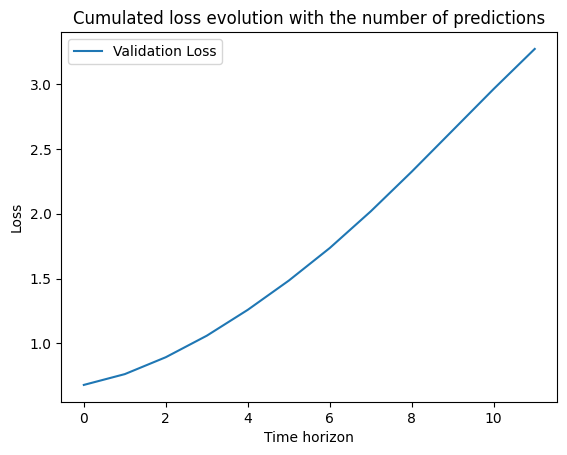

In [86]:

import numpy as np
x = [(np.mean(k)**0.5)*64 for k in stats.values()]
print(x)
print(stats)
plt.xlabel("Time horizon")
plt.ylabel("Loss")
plt.title("Cumulated loss evolution with the number of predictions")
#plt.plot(train_loss,label="Train loss")
plt.plot(x,label="Validation Loss")
plt.legend()
plt.show()

In [75]:
!pwd

/home/depren/transformer_trajectory_prediction/SDD


[0.9409900290649623, 0.9765906702526875, 1.0767552303041652, 1.221321793814842, nan, nan, nan, nan, nan, nan, nan, nan]
{0: [0.0001628305035410449, 0.000189270795090124, 0.00020592370128724724, 0.00023288039665203542, 0.0002430045569781214, 0.00017597273108549416, 0.00020753384160343558, 0.00019259274995420128, 0.00023473994224332273, 0.0001601343392394483, 0.00018362552509643137, 0.0002572231460362673, 0.00019764539320021868, 0.00020916928770020604, 0.00021038265549577773, 0.0002395989140495658, 0.00028339214622974396, 0.0001926429831655696, 0.00021972673130221665, 0.0002645686035975814, 0.00019783912284765393, 0.00020572813809849322, 0.0002725509402807802, 0.00023745268117636442, 0.00020022921671625227, 0.0002213584812125191, 0.0001823206403059885, 0.00022998123313300312, 0.00017545522132422775, 0.00022252353664953262, 0.00019870280812028795, 0.0002647219516802579, 0.0001796453434508294, 0.00022705031733494252, 0.00024129997473210096, 0.000239173139561899, 0.00021676030883099884, 0.0

/waldo/walban/student_datasets/arfranck/betelenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/waldo/walban/student_datasets/arfranck/betelenv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: x and y must have same first dimension, but have shapes (8,) and (12,)

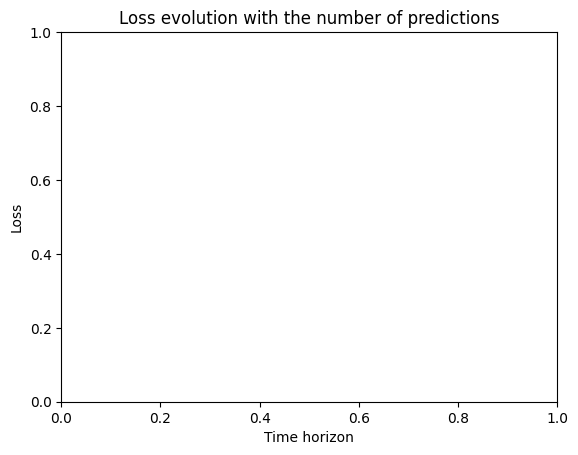

In [99]:

import numpy as np
x = [(np.mean(k)**0.5)*64 for k in stats.values()]
print(x)
print(stats)
plt.xlabel("Time horizon")
plt.ylabel("Loss")
plt.title("Loss evolution with the number of predictions")
#plt.plot(train_loss,label="Train loss")
plt.plot([k for k in range(1,9)],x,label="Validation Loss")
plt.legend()
plt.show()

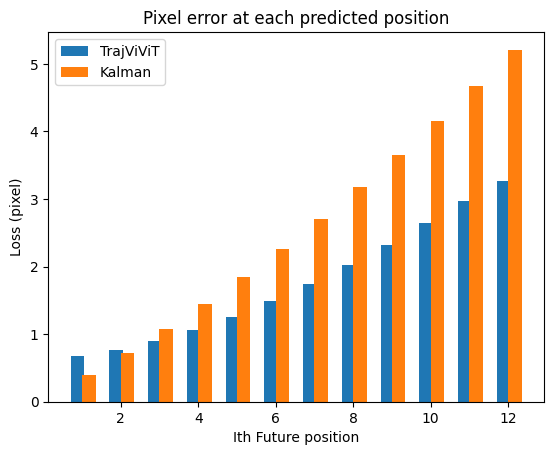

In [93]:
#x = [0.0042,0.0044,0.0045,0.00378,0.0044,0.0042]
#MODEL_4=y1
y1 = np.array(x)
x_ticks = np.arange(1, 13)
#OLD VALUESy2 = [0.15,0.33,0.60,0.97,1.45,2,2.8,3.72,4.79,6.04,7.48,9.12]
y2 = np.array([3.870404057191729e-05, 0.00012630494850699483, 0.00028001203135986626, 0.0005060622710028745, 0.0008251681865618316, 0.0012493531175844467, 0.0017920593516495059, 0.002460609238087347, 0.0032662126289168124, 0.004218625465177182, 0.005337063095046883, 0.0066232783356392185])
y3 = y2-y1
y2 = [0.3981604578339909, 0.7192670360058571, 1.0709478420772938, 1.4397329828922354, 1.8384474134870603, 2.2621561329019473, 2.709294207788511, 3.1746898177941376, 3.6576504655370314, 4.1568605828636755, 4.675533171448154, 5.208545676364779]
bar_width = 0.35  # Width of each bar

fig, ax = plt.subplots()
ax.bar(x_ticks - bar_width/3, y1, bar_width, label='TrajViViT')
ax.bar(x_ticks + bar_width/2, y2, bar_width, label='Kalman')
plt.title("Pixel error at each predicted position")
plt.xlabel(f"Ith Future position")
plt.ylabel("Loss (pixel)")
ax.legend()
plt.savefig("../plot_kalman.pdf")
